# Car Evaluation

# Decision Tree Classification with Python and Scikit-Learn


In this project, I build a Decision Tree Classifier to predict the safety of the car. I build two models, one with criterion gini index and another one with criterion entropy. I implement Decision Tree Classification with Python and Scikit-Learn. I have used the Car Evaluation Data Set for this project, downloaded from the UCI Machine Learning Repository website.

In [269]:
# impor Necessary libararies

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
pwd


'C:\\Users\\Admin'

In [272]:
df=pd.read_csv('C:/Users/Admin/Desktop/Practisse/car_evaluation.csv',header=None)

In [273]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [274]:
df.head().append(df.tail())

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [275]:
df.shape

(1728, 7)

In [276]:
print('The number of rows are {}'.format(df.shape[0]))
print('The number of colums are {}'.format(df.shape[1]))

The number of rows are 1728
The number of colums are 7


We can see that there are 1728 instances and 7 variables in the data set.

In [277]:
import warnings
warnings.filterwarnings('ignore')

# Rename column names


We can see that the dataset does not have proper column names. The columns are  labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [278]:
df.rename(columns={0:'Buying',1:'maint',2:'doors',3:'persons',4:'lug_boot',5:'safety',6:'class'},inplace=True)

In [279]:
df.head()

,Buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
Buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [281]:
df.columns

Index(['Buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [282]:
df_missing=[feature for feature in df.columns if df[feature].isnull().sum()>1]
df_missing

[]

In [283]:
for feature in df_missing:
    print(feature,np.round(df[feature].isnull().mean(),2,'Missing values'))
    

# View statistical properties of dataset

In [284]:
df.describe()

,Buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,3,more,big,low,unacc
freq,432,432,432,576,576,576,1210


Important points to note¶
The above command df.describe() helps us to view the statistical properties of numerical variables. It excludes character variables.

If we want to view the statistical properties of character variables, we should run the following command -

In [285]:
df.describe(include=['object'])
#df.describe(include=['O']) we can try this as well

,Buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,3,more,big,low,unacc
freq,432,432,432,576,576,576,1210


# Univariate Analysis

In [286]:
# Explore  target variable

In [287]:
df['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

There are 4 unique labels in Target variable

In [288]:
df['class'].nunique()

4

In [289]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

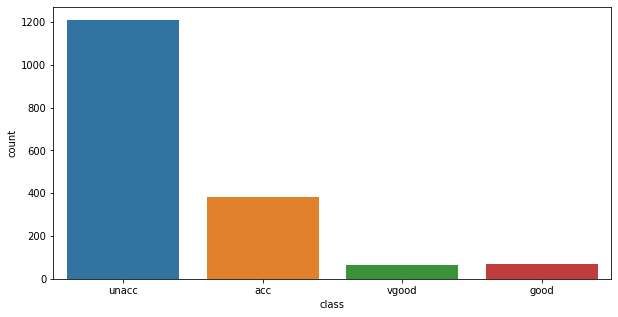

In [290]:
plt.figure(figsize=(10,5))
sns.countplot(df['class'])

Lets check for null values

In [291]:
df['class'].isnull().any()

False

In [292]:
df['class'].isnull().sum()

0

In [293]:
target_na=[feature for feature in df.columns if df['class'].isnull().sum()>0 ]
target_na

[]

we can conclude that there are no null values in Target variable

In [294]:
class_freq=df['class'].value_counts()/len(df)*100
class_freq

unacc    70.023148
acc      22.222222
good      3.993056
vgood     3.761574
Name: class, dtype: float64

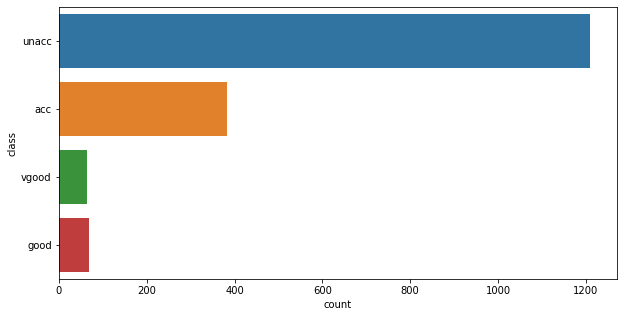

In [295]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['class'])

Findings of Univariate Analysis The number of unique values in class variable is 4.

The four unique values are 'unacc', 'acc', 'vgood', 'good'.

Out of the total number of values unacc -70.023148  acc 22.222222 good 3.99305 vgood 3.761574 times.



# Bivariate Analysis


Types of variables In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.

First of all, I will find categorical variables.

In [296]:
categorical=[feature for feature in df.columns if df[feature].dtype=='O' ]


In [297]:
categorical

['Buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [298]:
print('The number of categorical varaibles are {}'.format(len(categorical)))

The number of categorical varaibles are 7


In [299]:
print('The categorical variables are',categorical)

The categorical variables are ['Buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


In [300]:
df[categorical].head().append(df[categorical].tail())

,Buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [301]:
cat_unique=df[categorical].nunique()
cat_unique

Buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

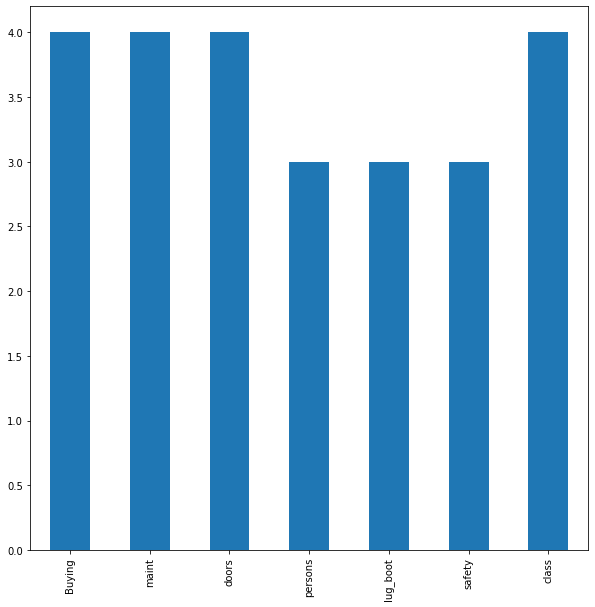

In [302]:
cat_unique.plot(kind='bar',)

# Explore problems within categorical variables

Missing values in categorical variables

In [303]:
categorical_na=[feature for feature in categorical if df[feature].isnull().sum()]
categorical_na


[]

In [304]:
df[categorical].isnull().sum()

Buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Frequency count of categorical variables

In [305]:
for var in categorical:
    print(df[var].value_counts())

low      432
vhigh    432
high     432
med      432
Name: Buying, dtype: int64
low      432
vhigh    432
high     432
med      432
Name: maint, dtype: int64
3        432
2        432
4        432
5more    432
Name: doors, dtype: int64
more    576
2       576
4       576
Name: persons, dtype: int64
big      576
small    576
med      576
Name: lug_boot, dtype: int64
low     576
high    576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [306]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [307]:
df['doors']=df['doors'].str.split('more').str[0]

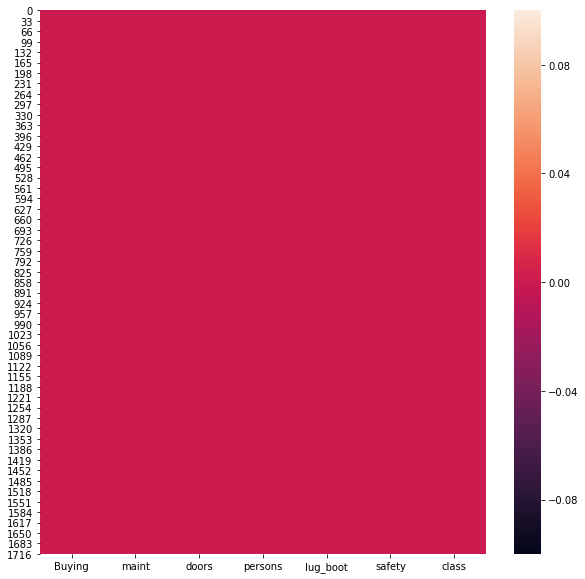

In [308]:
sns.heatmap(df.isnull())

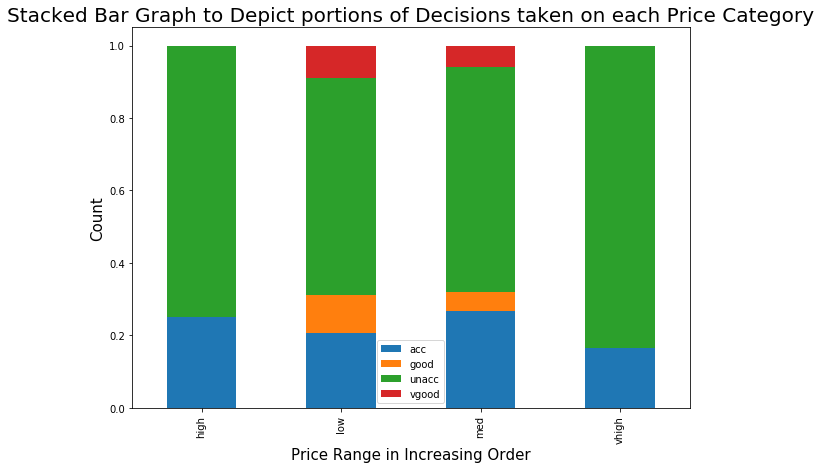

In [309]:
price = pd.crosstab(df['Buying'], df['class'])
price.div(price.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each Price Category', fontsize = 20)
plt.xlabel('Price Range in Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

In [310]:
df.head()

,Buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# EDA

In [311]:
x=pd.crosstab(df['safety'],df['class'])
x

class,acc,good,unacc,vgood
safety,,,,
high,204,30,277,65
low,0,0,576,0
med,180,39,357,0


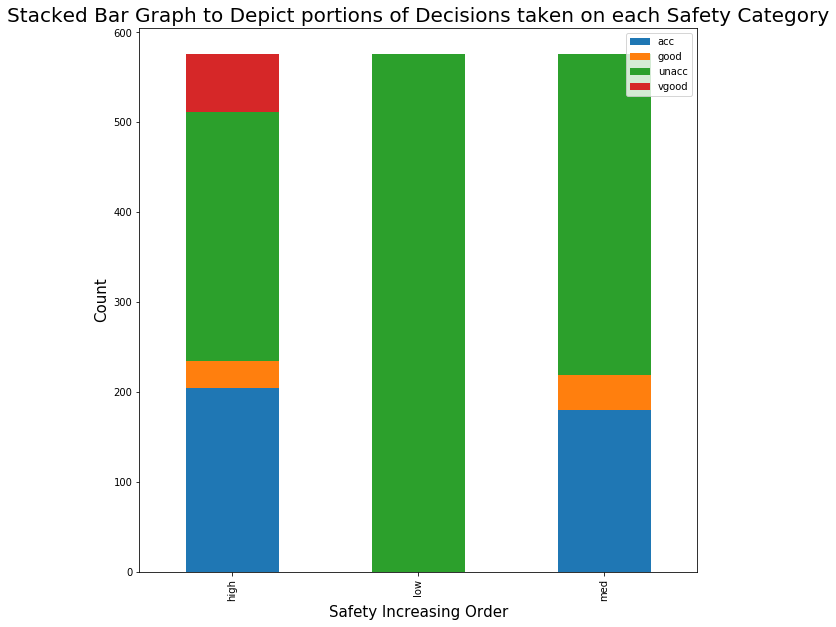

In [312]:
x.plot(kind='bar',stacked=True)
plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each Safety Category', fontsize = 20)
plt.xlabel('Safety Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

In [313]:
doors=pd.crosstab(df['doors'],df['class'])
doors

class,acc,good,unacc,vgood
doors,,,,
2,81,15,326,10
3,99,18,300,15
4,102,18,292,20
5,102,18,292,20


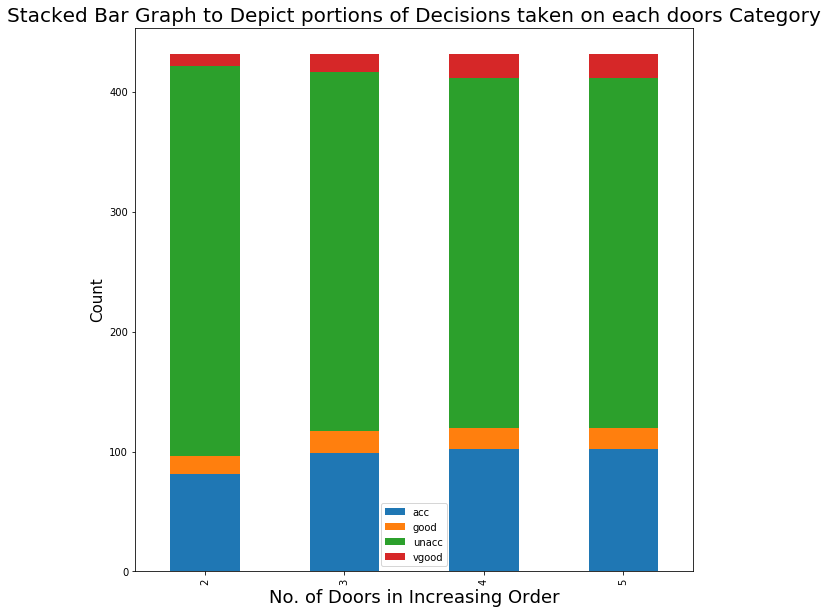

In [314]:
doors.plot(kind='bar',stacked=True)
plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each doors Category', fontsize = 20)
plt.xlabel('No. of Doors in Increasing Order', fontsize = 18)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

In [315]:
buying=pd.crosstab(df['Buying'],df['class'])
buying

class,acc,good,unacc,vgood
Buying,,,,
high,108,0,324,0
low,89,46,258,39
med,115,23,268,26
vhigh,72,0,360,0


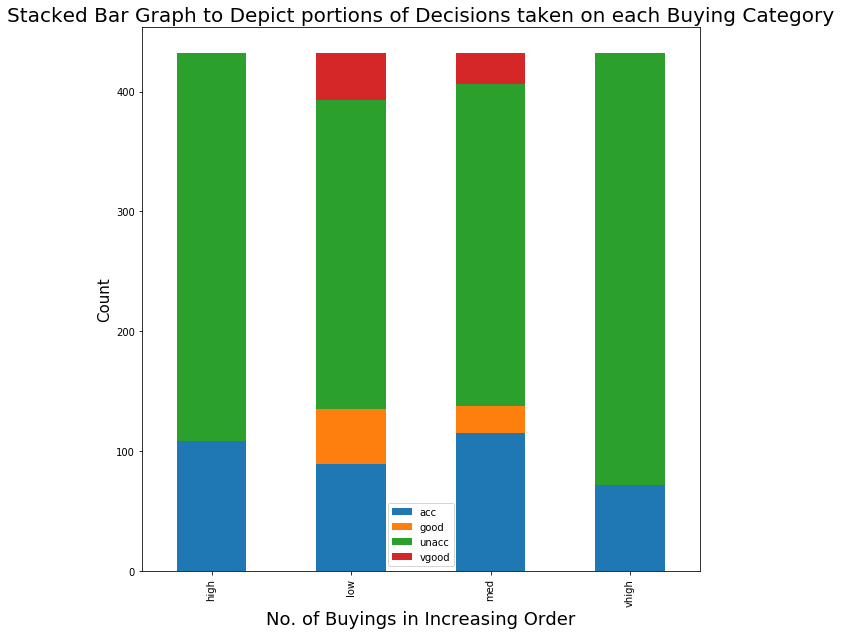

In [316]:
buying.plot(kind='bar',stacked=True)
plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each Buying Category', fontsize = 20)
plt.xlabel('No. of Buyings in Increasing Order', fontsize = 18)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

In [317]:
maintience=pd.crosstab(df['maint'],df['class'])
maintience

class,acc,good,unacc,vgood
maint,,,,
high,105,0,314,13
low,92,46,268,26
med,115,23,268,26
vhigh,72,0,360,0


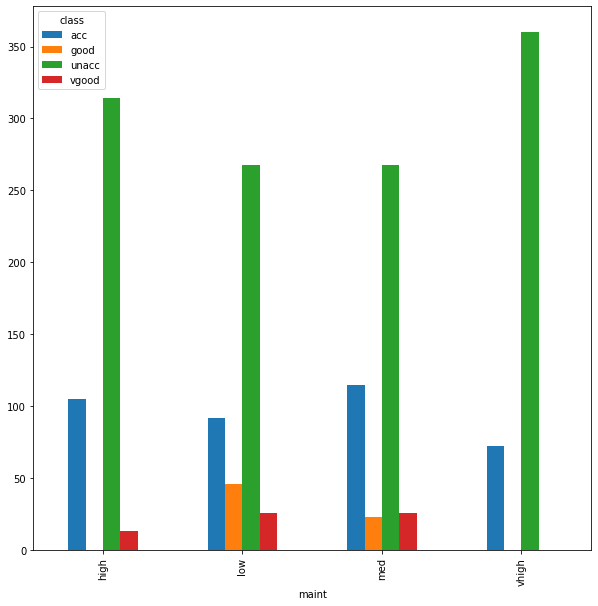

In [318]:
maintience.plot(kind='bar')

In [319]:
df.head()

,Buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [320]:
class_counts=df['class'].value_counts().sort_values(ascending=False)
class_counts

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

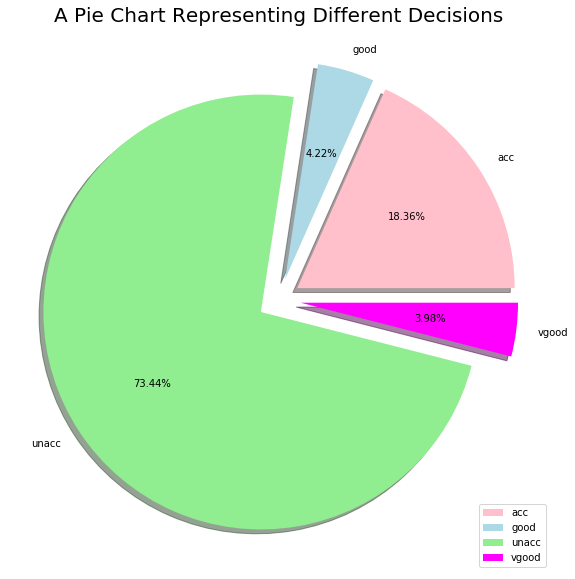

In [321]:
labels = ['acc', 'good', 'unacc', 'vgood']
colors = ['pink', 'lightblue', 'lightgreen', 'magenta']
size = [300, 69, 1200, 65]
explode = [0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Different Decisions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# LABEL ENCODING

In [322]:
df['class'].replace(('unacc', 'acc', 'vgood', 'good'),(1,2,4,3),inplace=True)

In [323]:
df['class'].value_counts().sort_values(ascending=False)

1    1210
2     384
3      69
4      65
Name: class, dtype: int64

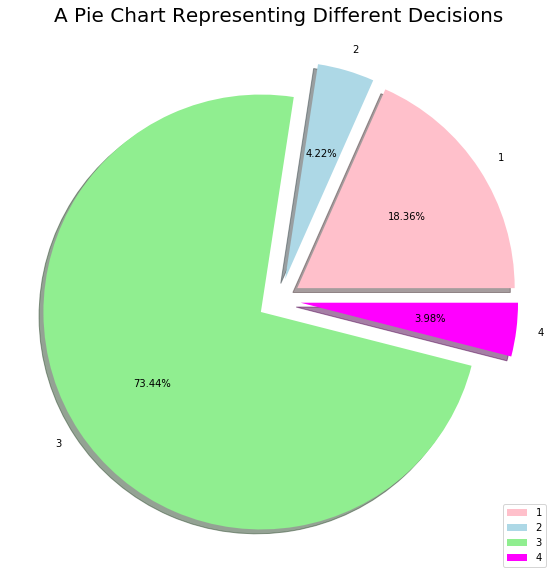

In [324]:
labels = [1,2,3,4]
colors = ['pink', 'lightblue', 'lightgreen', 'magenta']
size = [300, 69, 1200, 65]
explode = [0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Different Decisions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [325]:
df.head(1)

,Buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,1


In [326]:
df['lug_boot'].replace(('small', 'med', 'big'),(1,2,3),inplace=True)

In [327]:
df['lug_boot'].unique()

array([1, 2, 3], dtype=int64)

In [328]:
df['lug_boot'].value_counts().sort_values()

3    576
2    576
1    576
Name: lug_boot, dtype: int64

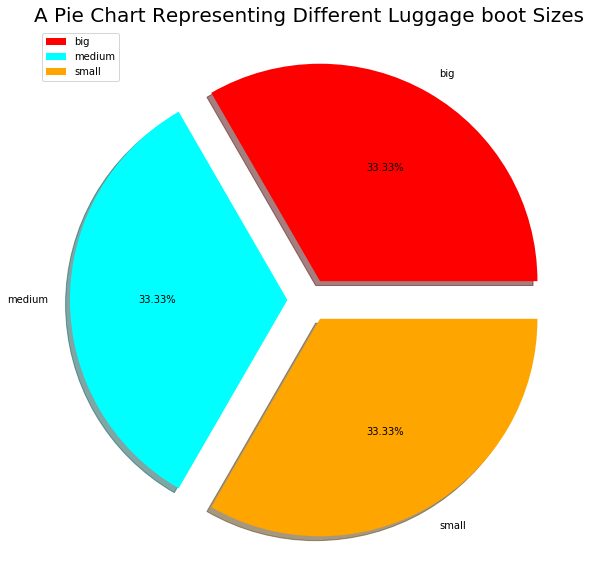

In [329]:
labels = ['big', 'medium', 'small',]
colors = ['red', 'cyan', 'orange']
size = [576, 576, 576]
explode = [0.1, 0.1, 0.1]
plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('A Pie Chart Representing Different Luggage boot Sizes', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [330]:
df['safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [331]:
df['safety'].replace(('low', 'med', 'high'),(1,2,3),inplace=True)

In [332]:
df['safety'].unique()

array([1, 2, 3], dtype=int64)

In [333]:
df['safety'].value_counts()

3    576
2    576
1    576
Name: safety, dtype: int64

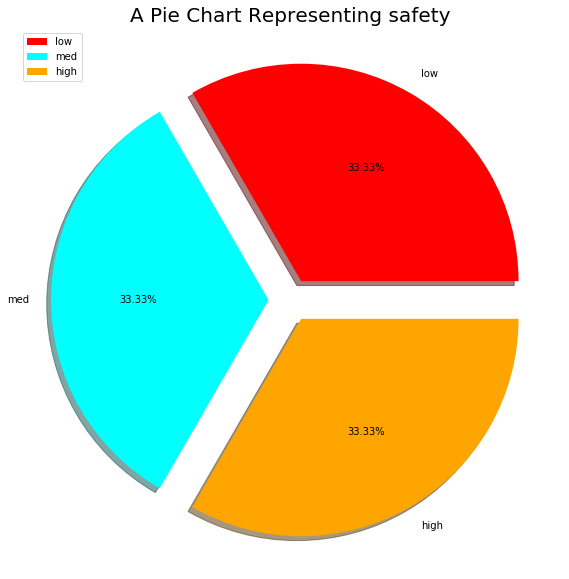

In [334]:
labels = ['low', 'med', 'high']
colors = ['red', 'cyan', 'orange']
size = [576, 576, 576]
explode = [0.1, 0.1, 0.1]
plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('A Pie Chart Representing safety', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [335]:
df.head()

,Buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,1,1,1
1,vhigh,vhigh,2,2,1,2,1
2,vhigh,vhigh,2,2,1,3,1
3,vhigh,vhigh,2,2,2,1,1
4,vhigh,vhigh,2,2,2,2,1


In [336]:
df['Buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [337]:
df['Buying'].replace(('vhigh', 'high', 'med', 'low'),(4,3,2,1),inplace=True)

In [338]:
df['Buying'].unique()

array([4, 3, 2, 1], dtype=int64)

In [339]:
df['Buying'].value_counts()

4    432
3    432
2    432
1    432
Name: Buying, dtype: int64

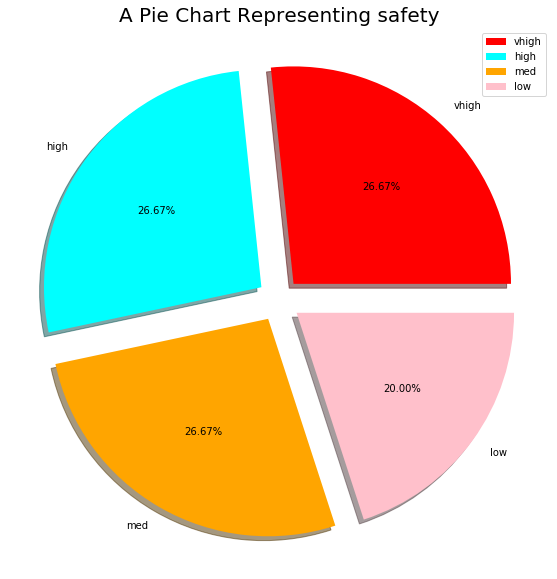

In [340]:
labels = ['vhigh', 'high', 'med', 'low']
colors = ['red', 'cyan', 'orange','pink']
size = [576, 576, 576,432]
explode = [0.1, 0.1, 0.1,0.1]
plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('A Pie Chart Representing safety', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [341]:
df.head()

,Buying,maint,doors,persons,lug_boot,safety,class
0,4,vhigh,2,2,1,1,1
1,4,vhigh,2,2,1,2,1
2,4,vhigh,2,2,1,3,1
3,4,vhigh,2,2,2,1,1
4,4,vhigh,2,2,2,2,1


In [342]:
df['maint'].replace(('vhigh', 'high', 'med', 'low'),(4,3,2,1),inplace=True)

In [343]:
df['maint'].unique()

array([4, 3, 2, 1], dtype=int64)

In [344]:
df['maint'].value_counts()

4    432
3    432
2    432
1    432
Name: maint, dtype: int64

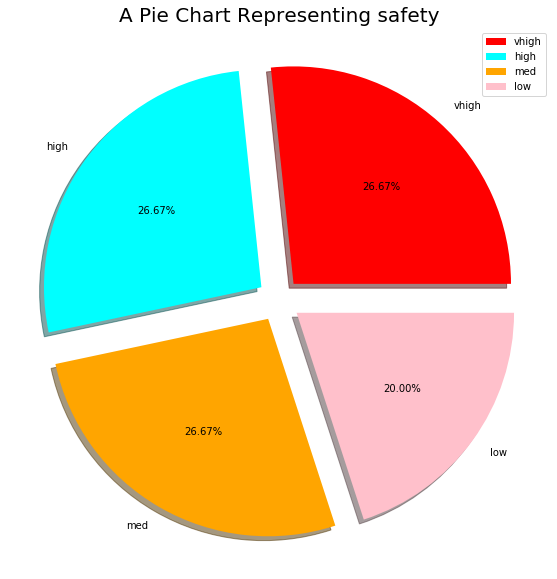

In [345]:
labels = ['vhigh', 'high', 'med', 'low']
colors = ['red', 'cyan', 'orange','pink']
size = [576, 576, 576,432]
explode = [0.1, 0.1, 0.1,0.1]
plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('A Pie Chart Representing safety', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [346]:
df.head()

,Buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
Buying      1728 non-null int64
maint       1728 non-null int64
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null int64
safety      1728 non-null int64
class       1728 non-null int64
dtypes: int64(5), object(2)
memory usage: 94.6+ KB


In [348]:
df['doors']=df['doors'].astype(int)

In [349]:
df['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [350]:
df['persons'].value_counts()

more    576
2       576
4       576
Name: persons, dtype: int64

In [351]:
df['persons'].replace('more', 5, inplace = True)

df['persons'].value_counts()

2    576
4    576
5    576
Name: persons, dtype: int64

In [352]:
df['persons']=df['persons'].astype(int)

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
Buying      1728 non-null int64
maint       1728 non-null int64
doors       1728 non-null int32
persons     1728 non-null int32
lug_boot    1728 non-null int64
safety      1728 non-null int64
class       1728 non-null int64
dtypes: int32(2), int64(5)
memory usage: 81.1 KB


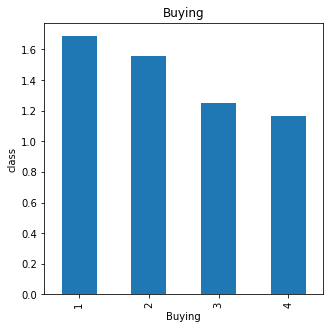

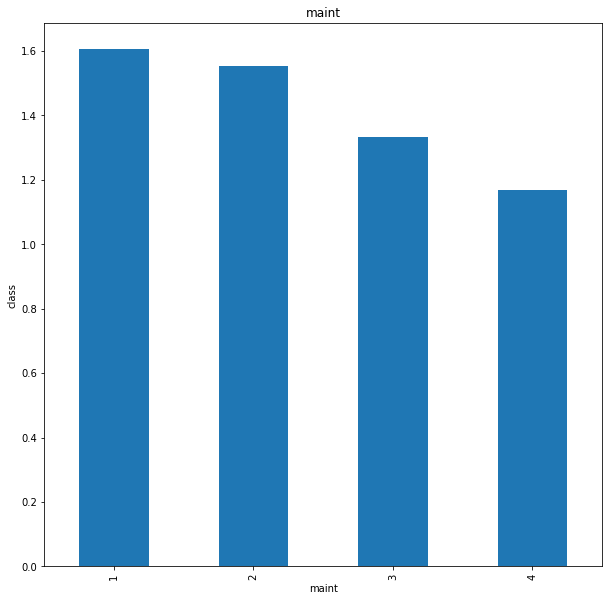

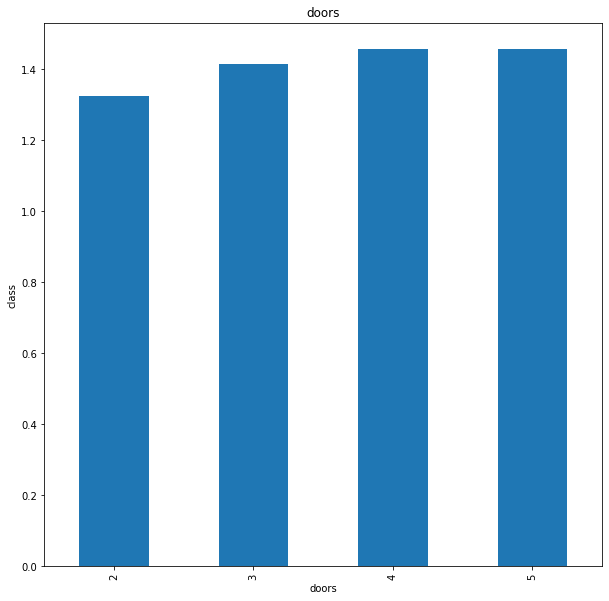

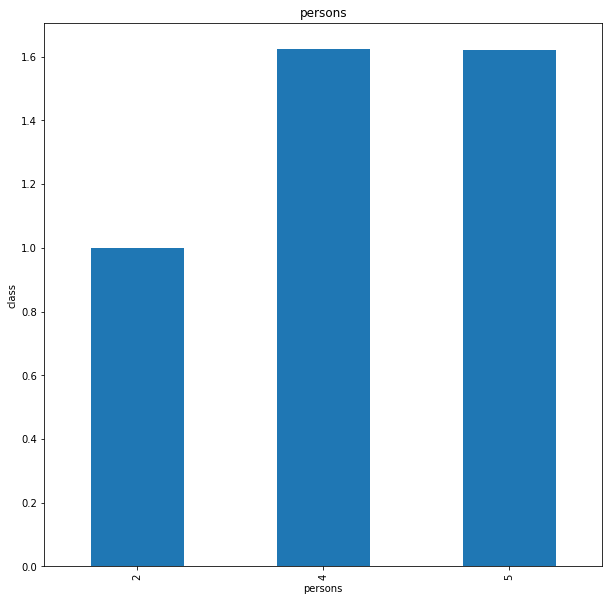

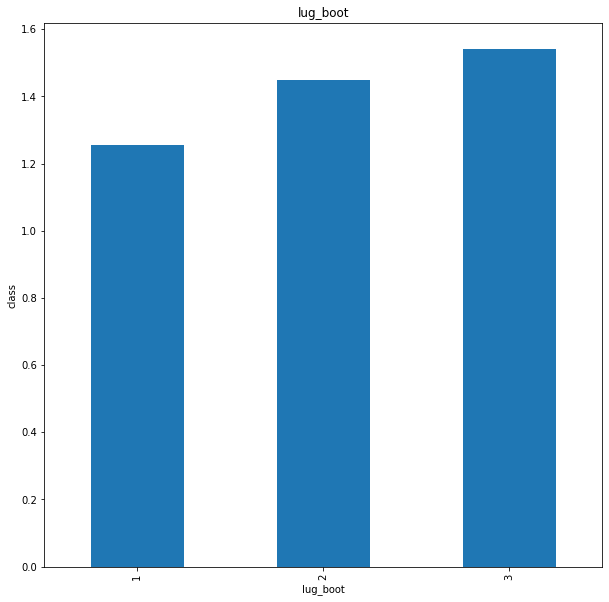

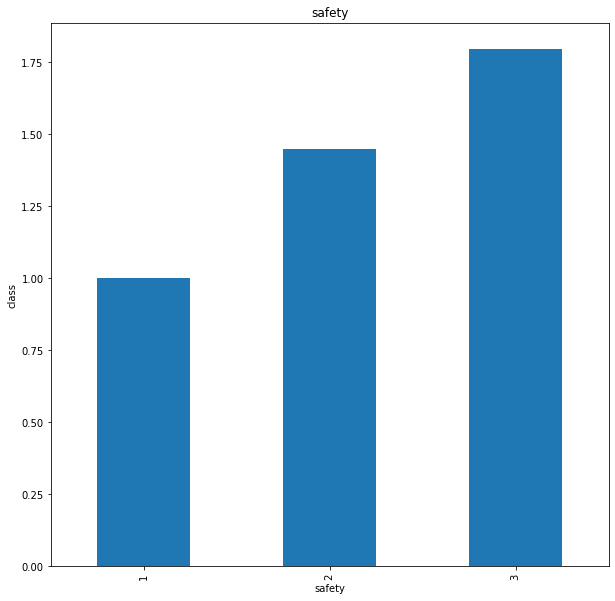

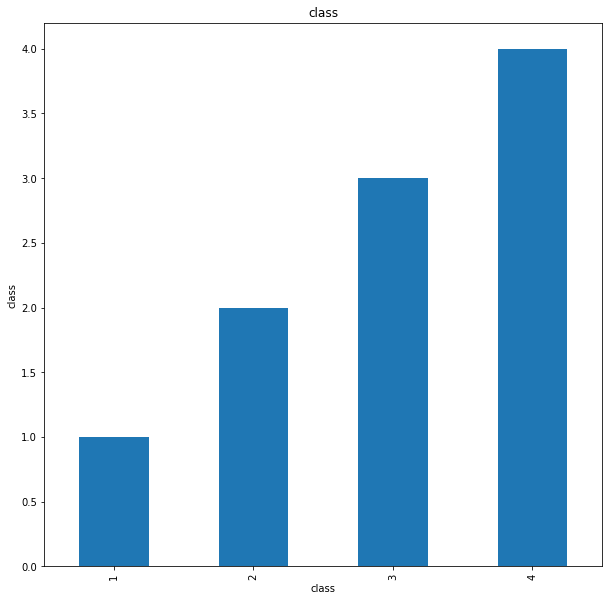

In [354]:
plt.figure(figsize=(5,5))
for feature in df.columns:
    df.groupby(feature)['class'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('class')
    plt.title(feature)
    plt.show()
    plt.show()

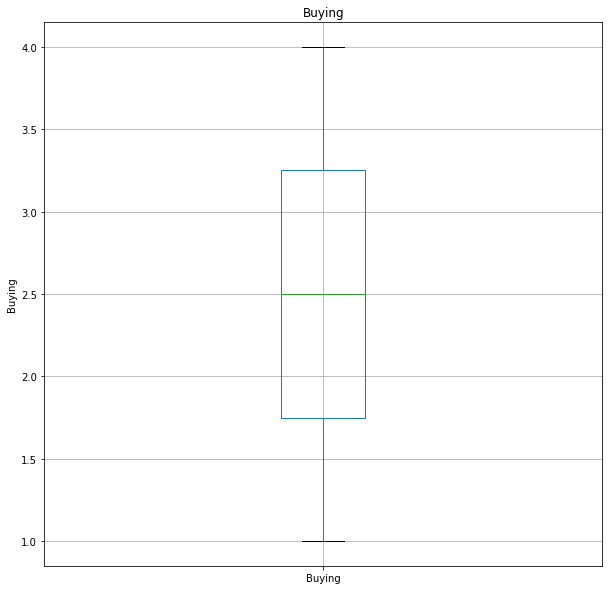

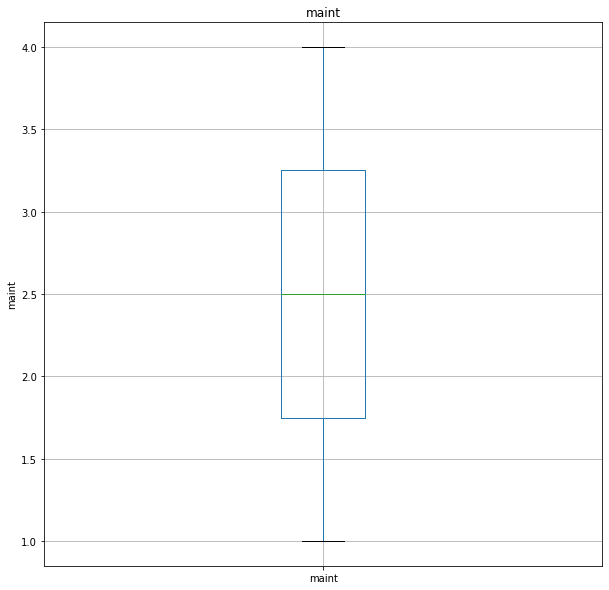

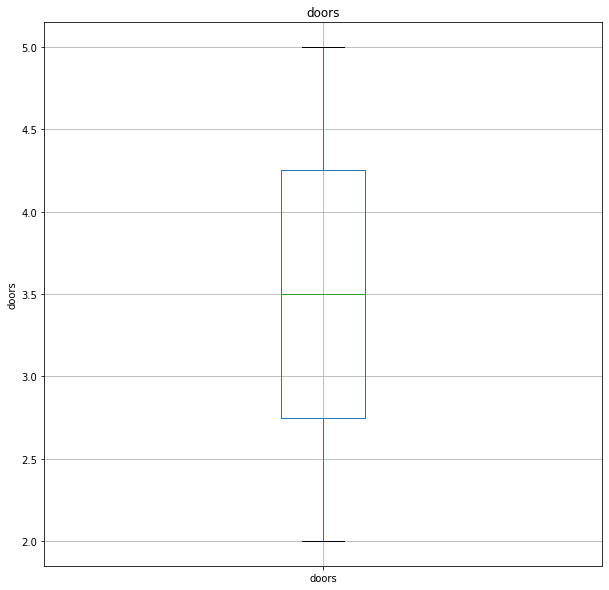

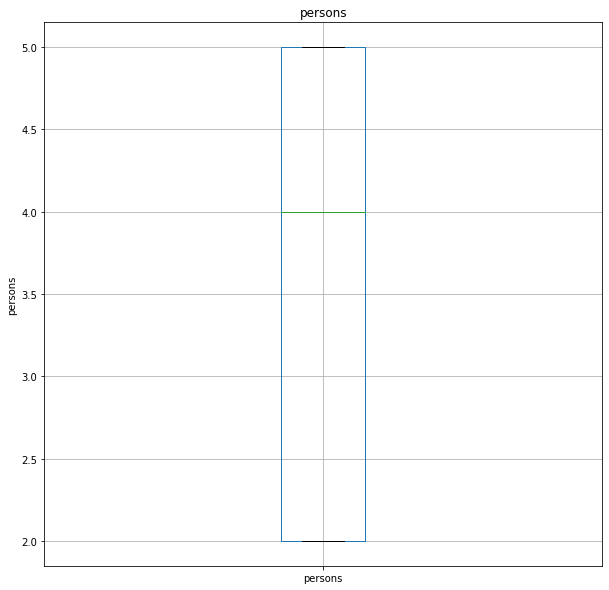

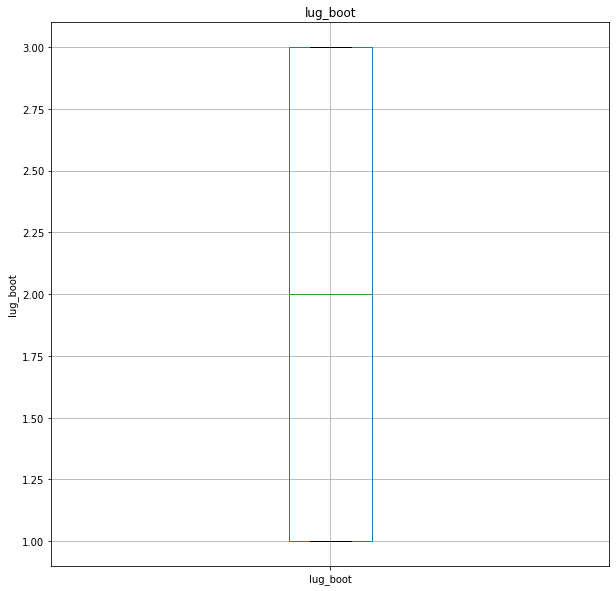

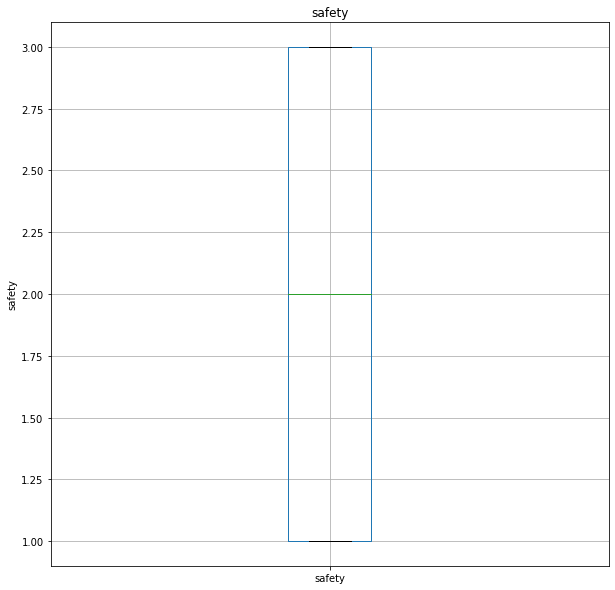

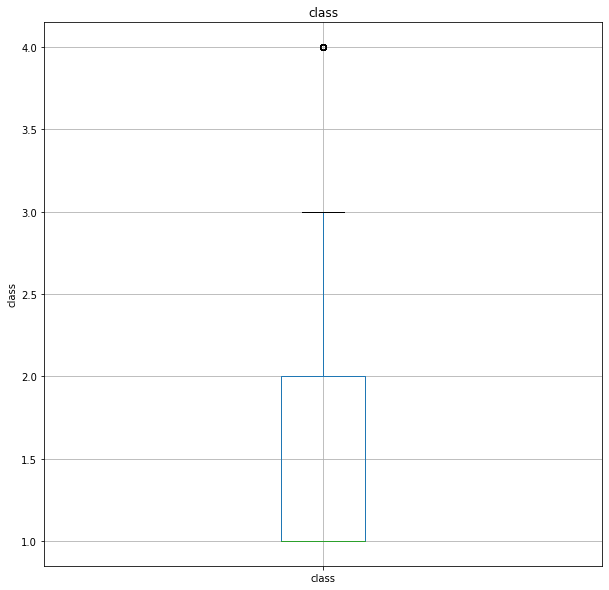

In [355]:
for feature in df.columns:
    df.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()
    

In [356]:
df.head().append(df.tail())

,Buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1
1723,1,1,5,5,2,2,3
1724,1,1,5,5,2,3,4
1725,1,1,5,5,3,1,1
1726,1,1,5,5,3,2,3
1727,1,1,5,5,3,3,4


In [357]:
corr=df.corr()
corr

,Buying,maint,doors,persons,lug_boot,safety,class
Buying,1.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-0.282750
maint,0.00000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-0.232422
doors,0.00000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.066057
persons,0.00000,0.000000,0.000000,1.000000e+00,2.523651e-19,0.000000,0.373459
lug_boot,0.00000,0.000000,0.000000,2.523651e-19,1.000000e+00,0.000000,0.157932
safety,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.439337
class,-0.28275,-0.232422,0.066057,3.734592e-01,1.579317e-01,0.439337,1.000000


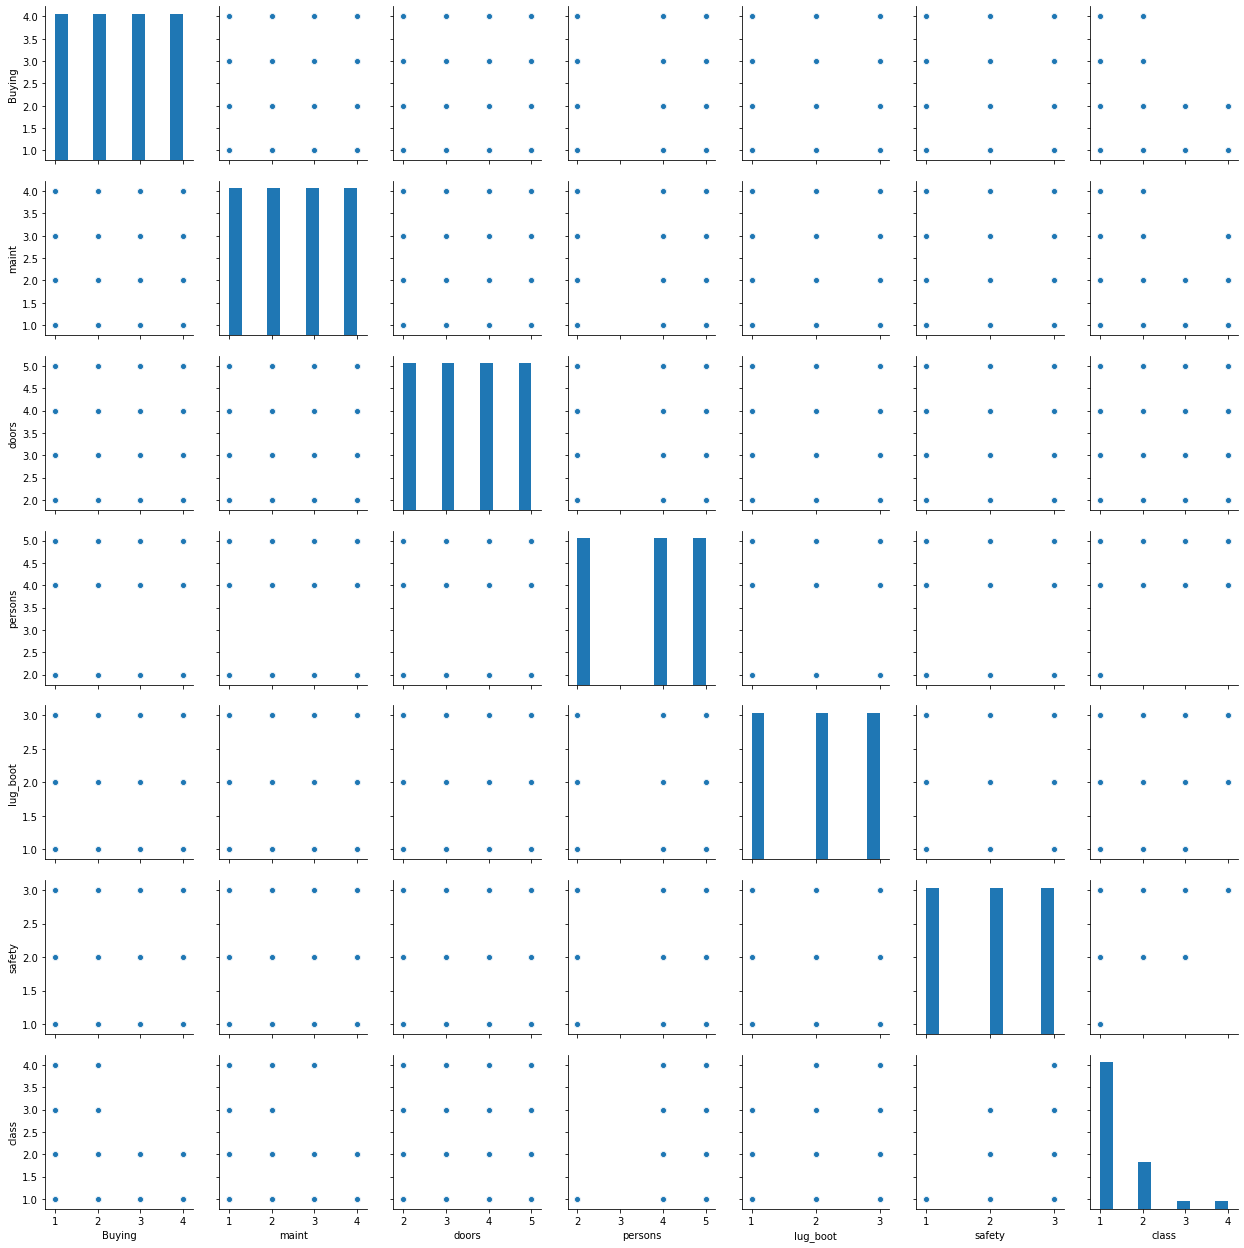

In [358]:
sns.pairplot(df[categorical])

In [359]:
df.shape

(1728, 7)

In [360]:
X=df.drop(columns=['class'])
X.head(2)

,Buying,maint,doors,persons,lug_boot,safety
0,4,4,2,2,1,1
1,4,4,2,2,1,2


In [361]:
y=df['class']
y.head(2)

0    1
1    1
Name: class, dtype: int64

In [362]:
y.replace((1,2,3,4),(1,1,2,2),inplace=True)
y.value_counts()

1    1594
2     134
Name: class, dtype: int64

In [363]:
from sklearn.model_selection import train_test_split

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [365]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1555, 6), (1555,), (173, 6), (173,))

In [366]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Decision Tree Classifier with criterion gini index

In [367]:
from sklearn.tree import DecisionTreeClassifier

In [388]:
classifier_gini=DecisionTreeClassifier(criterion='gini',max_depth=5)

In [389]:
classifier_gini.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [390]:
y_gini_pred=classifier_gini.predict(X_test)
y_gini_pred

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [391]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [392]:
accuracy_score(y_test,y_gini_pred)

0.9710982658959537

# Check for overfitting and underfitting

In [393]:
print('Training set score:{}'.format(classifier_gini.score(X_train,y_train)*100))
print('Testing set score:{}'.format(classifier_gini.score(X_test,y_test)*100))

Training set score:96.07717041800643
Testing set score:97.10982658959537



We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 78% while the test-set accuracy to be 81%. These two values are quite comparable. So, there is no sign of overfitting.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue

In [394]:
confusion_matrix(y_test,y_gini_pred)

array([[161,   1],
       [  4,   7]], dtype=int64)

In [395]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_gini_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       162
           2       0.88      0.64      0.74        11

    accuracy                           0.97       173
   macro avg       0.93      0.82      0.86       173
weighted avg       0.97      0.97      0.97       173



In [396]:
classifier_ent=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [397]:
classifier_ent.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [398]:
y_ent_pred=classifier_ent.predict(X_test)

In [399]:
accuracy_score(y_test,y_ent_pred)

0.9479768786127167

In [400]:
print(classification_report(y_test,y_ent_pred))

              precision    recall  f1-score   support

           1       0.99      0.95      0.97       162
           2       0.56      0.91      0.69        11

    accuracy                           0.95       173
   macro avg       0.77      0.93      0.83       173
weighted avg       0.97      0.95      0.95       173



In [387]:
confusion_matrix(y_test,y_ent_pred)

array([[154,   8],
       [  1,  10]], dtype=int64)